# Reverifying accuracy on methods established in causal gateways and mediators in complex spatio-temporal system.

## Abstract

In this work, the principles of Causal Structure Discovery (CSD) and deep learning methodologies, traditionally applied to climate systems are extended, to the realm of biodiversity, specifically focusing on species distribution and interaction models. By integrating these models with existing climatic system frameworks, the aim is to uncover causal gateways and pinpoint perturbation points within ecosystems. This integrative approach allows us to unravel the complex interdependencies in ecological networks, highlighting the vulnerability of keystone species to changes in the ecosystem and tracing the propagation of perturbations across various species. This study not only provides a novel perspective on the dynamics of species interactions in response to climatic shifts but also sets a new benchmark in the combined application of CSD and deep learning in ecological research. This work is pivotal in understanding the cascading effects of environmental changes on biodiversity, offering insights into conservation strategies and the sustainable management of ecosystems.

In [19]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
# documentation: https://unidata.github.io/netcdf4-python/
from netCDF4 import Dataset
from geoFieldData import *
from IPython import display

## 1. Data Analysis

The data for this analysis comes from two sources. The climate data is taken from NOAA Physical Sciences Laboratory under NCEP/NCAR Reanalysis project and for the bio diversity species interaction model data is synthetic. For synthetic data first a species interaction graph is generated and the data is generated through simulating nodes of the graphs under various conditions. The climate dataset contains air temperature data, represented in the unit "degK" (degrees Kelvin). The data is a slice from a netCDF file named 'air.4Xday.1981-2010.ltm.nc'. This specific slice represents temperature values for a particular time instance and level (possibly an altitude or depth), over a grid defined by certain latitude and longitude ranges.The temperature matrix displays values across 11 longitudes (columns) and 11 latitudes (rows). The values range from approximately 244.31K to 276.04K. These temperatures can provide insights into climatic conditions, temperature variations, and potentially highlight specific geographic patterns or anomalies.

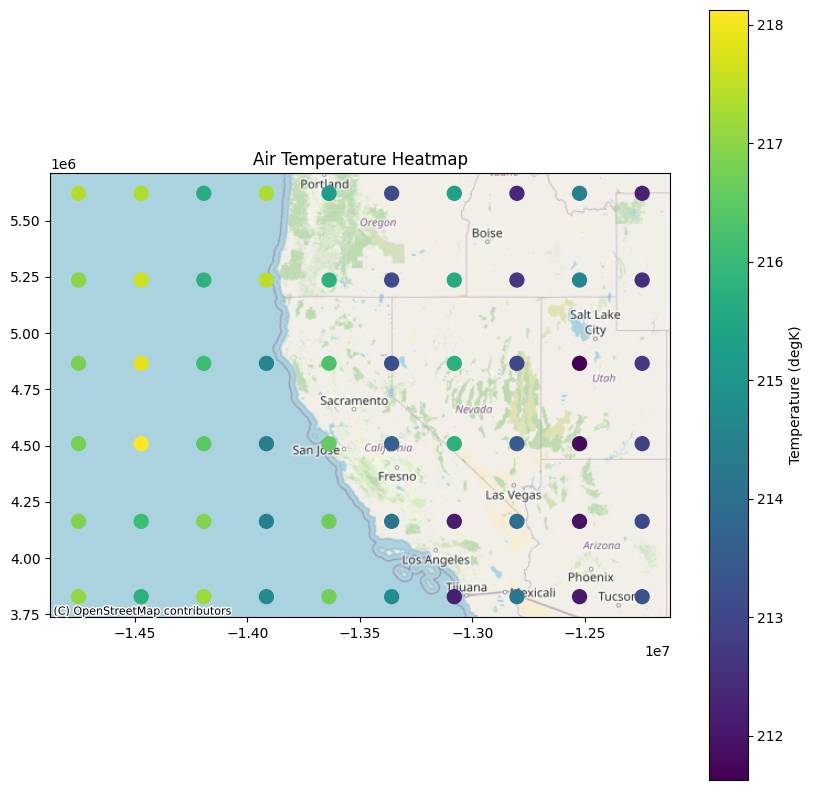

   longitude  latitude  temperature
0      227.5      45.0   217.370010
1      227.5      42.5   217.010010
2      227.5      40.0   216.806671
3      227.5      37.5   216.763336
4      227.5      35.0   216.863342


In [20]:
climate_data_slice = get_data_slice(data, (18, 24), (91, 101), level_index=10)
plot_on_basemap(climate_data_slice)
print(climate_data_slice.head())

                              Coyote       Oak      Deer  Woodpecker  \
timestamp                                                              
2024-01-13 09:28:25.237809  1.881019  0.550162  2.729791    3.745234   
2024-01-13 09:28:25.237951  0.990054  0.545251  1.899703    3.490893   
2024-01-13 09:28:25.238321  1.339234  0.534027  1.751728    2.942726   
2024-01-13 09:28:25.238567  0.862715  0.545664  2.105286    3.421237   
2024-01-13 09:28:25.238798  0.810915  0.541395  1.579799    2.657256   

                                Frog      Hawk  
timestamp                                       
2024-01-13 09:28:25.237809  4.122734  2.857848  
2024-01-13 09:28:25.237951  3.132389  3.071288  
2024-01-13 09:28:25.238321  3.384301  2.832806  
2024-01-13 09:28:25.238567  3.069964  2.682213  
2024-01-13 09:28:25.238798  2.491303  1.755552  


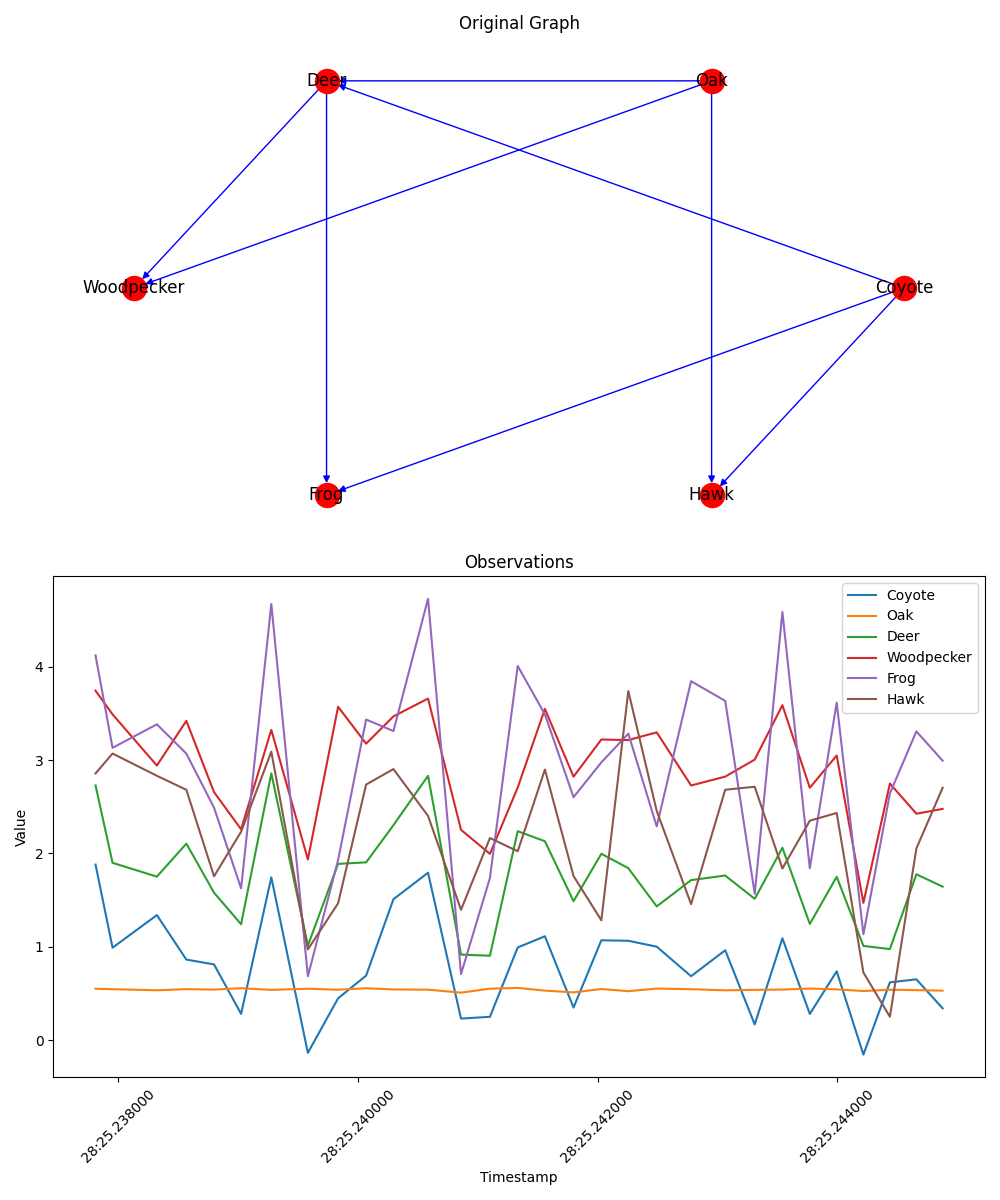

In [21]:
species_data = pd.read_csv('data/simulatory_observations/7/observations.csv')
observations = species_data.set_index('timestamp')
print(observations.head())
display.Image("data/simulatory_observations/7/image.png")

In [23]:
correlation_matrix = observations.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              Coyote       Oak      Deer  Woodpecker      Frog      Hawk
Coyote      1.000000  0.153255  0.870012    0.771377  0.832164  0.525143
Oak         0.153255  1.000000  0.171358    0.148470  0.153705  0.064066
Deer        0.870012  0.171358  1.000000    0.777890  0.843166  0.541683
Woodpecker  0.771377  0.148470  0.777890    1.000000  0.664638  0.519192
Frog        0.832164  0.153705  0.843166    0.664638  1.000000  0.453853
Hawk        0.525143  0.064066  0.541683    0.519192  0.453853  1.000000


We can also track auto correlation for a particular variable to understand a variable is affecting its own trajectory either by itself or by the affects of other variables including confounders.

In [28]:
data = observations['Deer'].values
lag = 10
np.corrcoef(np.array([data[:-lag], data[lag:]]))

array([[ 1.        , -0.09011217],
       [-0.09011217,  1.        ]])